Ejercicio 10 2º parcial 2016

Para batir un objetivo que se aleja del punto de lanzamiento con un movimiento rectilíneo y uniforme de 600m/s, se lanza un misil guiado con NP de a=4 y capacidad de maniobra máxima de 170 m/s^2. Dentro de qué valores de puntería respecto de la visual es posible obtener impacto, si el lanzamiento es realizado con una velocidad de 1000 m/s, a 2000m de disntancia y con ángulo de presentación δt0 de 10º ( el error de cálculo de puntería δm0 debe ser <=0.001rad)

In [1]:
#primero importamos
import numpy as np
#importar numpy para calculo numérico
from sympy import *
#importar sympy para calculo simbolico
init_printing(use_latex=True)
from scipy import optimize
import math


In [2]:
# δt0 ángulo de presentación de combate, el inicial del target respecto
#a la línea que une target y misil en el inicio, rad
δt0=rad(10)

# a constante reducida de la navegación proporcional, a>1 condición necesaria para impacto, adim
a=4

r0=2000
Vm=1000
Vt=600

g=9.8056

Γmax=170


In [3]:
# δmc ángulo de colisión ideal rad
δmc=asin((Vt/Vm)*sin(δt0))
δmc.evalf()

#Primero calculamos todo para δmc

# Va velocidad de aproximación, m/s
Va=Vm*cos(δmc)-Vt*cos(δt0)
Va.evalf()

# tf tiempo de vuelo
t0=0
tf=r0/Va+t0

# ∆δm Error de puntería, rad
Aδm=(Γmax*tf)/(a*Vm)
Aδm.evalf()

# ∆δm, el error de puntería puede ir en ambas direcciones:

#δ+m0 =δmc +Δδm
δm0max=δmc+Aδm

for i in range(30): #iteramos para sacar la solución
    Vamax=(Vm*cos(δm0max)-Vt*cos(δt0)).evalf() #evalf para no petar el ordenador
    tfmax=r0/Vamax+t0
    Aδmmax=(Γmax*tfmax)/(a*Vm)
    δm0max=δmc+Aδmmax
    

#δ-m0 =δmc -Δδm
δm0min=δmc-Aδm

for ii in range(30): #iteramos para sacar la solución
    Vamin=(Vm*cos(δm0min)-Vt*cos(δt0)).evalf() #evalf para no petar el ordenador
    tfmin=r0/Vamin+t0
    Aδmmin=(Γmax*tfmin)/(a*Vm)
    δm0min=δmc-Aδmmin
    

# δmo ángulo de puntería, ángulo inicial del misil respecto
#a la línea que une target y misil en el inicio, rad
print('El misil impactaría con ángulos de puntería')
print(deg(δm0min).evalf(),'º','< δm0 <',deg(δm0max).evalf(),'º')
δm0min.evalf()
print(δm0min.evalf(),'rad','< δm0 <',δm0max.evalf(),'rad')

El misil impactaría con ángulos de puntería
-6.09015642322529 º < δm0 < 19.9247563729369 º
-0.106293281546762 rad < δm0 < 0.347752601365473 rad


In [7]:
Aδm.evalf()

In [5]:
#para Hp50g
δm0min=symbols('δm0min')
Vm=symbols("Vm")
Vt=symbols("Vt")
δt0=symbols("δt0")
r0=symbols("r0")
Γmax=symbols("Γmax")
a=symbols("a")
δmc=symbols("δmc")

Vamin=(Vm*cos(δm0min)-Vt*cos(δt0)).evalf() #evalf para no petar el ordenador
tfmin=r0/Vamin+t0
Aδmmin=(Γmax*tfmin)/(a*Vm)
δm0min=δmc-Aδmmin

In [6]:
#para Hp50g
δm0max=symbols('δm0max')
Vm=symbols("Vm")
Vt=symbols("Vt")
δt0=symbols("δt0")
r0=symbols("r0")
Γmax=symbols("Γmax")
a=symbols("a")
δmc=symbols("δmc")

Vamax=(Vm*cos(δm0max)-Vt*cos(δt0)) #evalf para no petar el ordenador
tfmax=r0/Vamax
Aδmmax=(Γmax*tfmax)/(a*Vm)
δm0max=δmc+Aδmmax

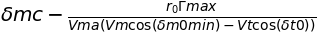

In [9]:
δm0min

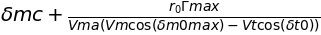

In [7]:
δm0max